1. 소규모 데이터셋으로 학습할 때 해결책

    - Data Augmentation
    - Transfer learning
    - Hyperparameter Optimization

# 1. 작은 데이터셋 문제에서 딥러닝의 타당성

1. 딥런닝은 데이터가 풍부할 때만 작동한다는 말을 듣습니다. 부분적으로는 맞습니다. 딥러닝의 근본적인 특징은 훈련 데이터에서 특성 공학의 수작업 없이 흥미로운 특성을 찾을 수 있는 것입니다. 이는 훈련 샘플이 맞아야 가능합니다. 입력 샘플이 이미지처럼 매우 고차원적인 문제에서 특히 그렇습니다.


2. 하지만 많은 샘플이 의미하는 것은 상대적입니다. 우선 훈련하려는 네트워크 크기와 깊이에 상대적입니다. 복잡한 문제를 푸는 컨브넷을 수십 개의 샘플만 사용해서 훈련하는 것은 불가능합니다. 하지만 모델이 작고 규제가 잘 되어 있으면 간단한 작업이라면 수백 개의 샘플로도 충분합니다. 컨브넷은 지역적이고 평행 이동으로 변하지 않는 특성을 학습하기에 지각에 관한 문제에서 매우 효율적으로 데이터를 사용합니다.


3. 거기에 딥러닝 모델은 태생적으로 매우 다목적입니다. 대규모 데이터셋에서 훈련시킨 이미지 분류 모델을 조금만 변경해서 완전히 다른 문제에 적용할 수 있습니다. 특히 컴퓨터 비전에서는 사전 훈련된 모델을 내려받을 수 있도록 많이 공개되어 매우 적은 데이터에섯에서 강력한 비전 모델을 만드는 데 사용할 수 있습니다.

# 2. 데이터 내려받기

In [1]:
import os, shutil

In [2]:
original_dataset_dir = './datasets/cats_and_dogs/train'
base_dir = './datasets/cats_and_dogs_small'
os.mkdir(base_dir)

In [3]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [4]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [5]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
print("train image cat: ", len(os.listdir(train_cats_dir)))
print("val image cat: ", len(os.listdir(validation_cats_dir)))
print("test image cat: ", len(os.listdir(test_cats_dir)))

print("train image dog: ", len(os.listdir(train_dogs_dir)))
print("val image dog: ", len(os.listdir(validation_dogs_dir)))
print("test image dog: ", len(os.listdir(test_dogs_dir)))

train image cat:  1000
val image cat:  500
test image cat:  500
train image dog:  1000
val image dog:  500
test image dog:  500


# 3. 네트워크 구성하기

In [16]:
from keras import layers
from keras import models

Using TensorFlow backend.


In [37]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [19]:
from keras import optimizers

In [40]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

# 4. 데이터 전처리

데이터는 네트워크 주입 전에 부동 소수점 타입의 텐서로 적절하게 전처리 되어 있어야 한다.

1. 사진 파일을 읽는다.
2. JPEG 콘텐츠를 RGB 값으로 디코팅한다.
3. 부동 소수 타입의 텐서로 변환한다.
4. 픽셀 값을 [0, 255]를 [0, 1] 사이로 조정한다.

In [22]:
from keras.preprocessing.image import ImageDataGenerator

In [41]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.


In [42]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [43]:
# 파이썬 제너레이터 예시
# def generator():
#    i = 0
#   while True:
#        i += 1
#        yield i
        
# for item in generator():
#   print(item)
#    if item > 4:
#        break

파이썬의 제너레이터는 특수한 반복자이며 yield 문을 사용해서 만든 경우를 제너레이터 함수, 소괄호와 리스트 내포 구문을 사용하는 경우 제너레이터 표현식이라 한다. 파이썬 itertools 아래에는 간단한 제너레이터를 대신할 수 있는 다양한 반복자가 준비되어 있다. 반복자와 제너레이터는 전체 항목을 미리 만들지 않으므로 메모리 효율적이다.

In [44]:
for data_batch, labels_batch in train_generator:
    print("batch data size: ", data_batch.shape)
    print("batch label size: ", labels_batch.shape)
    break

batch data size:  (20, 150, 150, 3)
batch label size:  (20,)


In [45]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)

# 훈련이 끝나면 항상 모델을 저장하는 것이 좋은 습관이다.
model.save('cats_and_dogs_small_1.h5')

Epoch 1/10
100/100 [==============================] - 36s 361ms/step - loss: 0.6918 - acc: 0.5310 - val_loss: 0.6710 - val_acc: 0.5750
Epoch 2/10
100/100 [==============================] - 36s 358ms/step - loss: 0.6563 - acc: 0.6090 - val_loss: 0.6465 - val_acc: 0.6300
Epoch 3/10
100/100 [==============================] - 36s 365ms/step - loss: 0.5992 - acc: 0.6830 - val_loss: 0.6321 - val_acc: 0.6510
Epoch 4/10
100/100 [==============================] - 37s 375ms/step - loss: 0.5710 - acc: 0.6980 - val_loss: 0.5870 - val_acc: 0.6800
Epoch 5/10
100/100 [==============================] - 37s 373ms/step - loss: 0.5360 - acc: 0.7260 - val_loss: 0.7379 - val_acc: 0.6210
Epoch 6/10
100/100 [==============================] - 37s 365ms/step - loss: 0.5084 - acc: 0.7440 - val_loss: 0.5626 - val_acc: 0.6980
Epoch 7/10
100/100 [==============================] - 36s 361ms/step - loss: 0.4865 - acc: 0.7630 - val_loss: 0.5612 - val_acc: 0.6970
Epoch 8/10
100/100 [==============================] - 3

### 정확도 70%

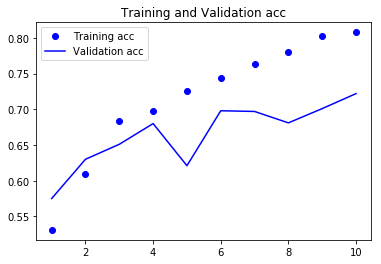

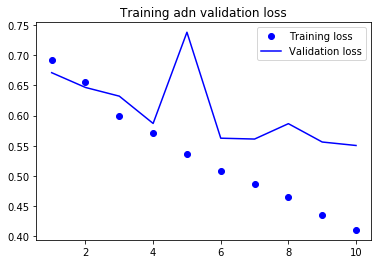

In [48]:
from matplotlib import pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation acc")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training adn validation loss")
plt.legend()
plt.show()

- Accuracy: 70%

# 5. Data Augmentation

- 과대적합은 학습할 샘플이 너무 적어 데이터에 일반화할 수 이쓴 모델을 훈련시키기 떄문에 발생한다. 무한히 많은 데이터가 주어지면 데이터 분포의 모든 가능한 측면을 학습할 수 있을 것이다. 데이터 증식은 기존 훈련 샘플로부터 더 많은 훈련 데이터를 생성하는 방법이다. 이 방법은 그럴듯한 이미지를 생성해서 여러 가지 랜덤한 변환을 적용하여 샘플을 늘립니다. 이렇게 하면 일반화에 도움이 된다.

In [50]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [52]:
from keras.preprocessing import image

# image processing module
fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150, 150))

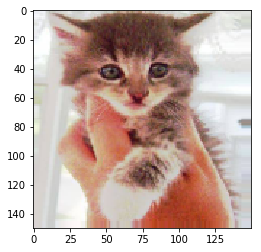

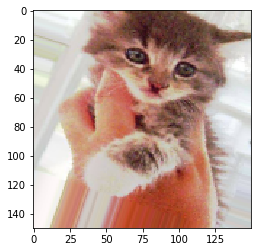

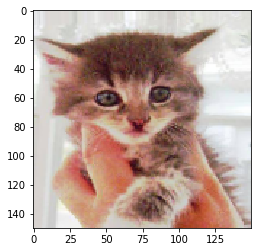

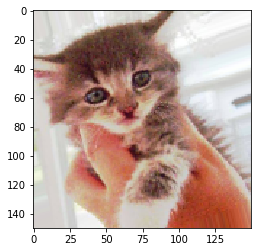

In [55]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

# converted image
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
        
plt.show()

### training with data augmentation and dropout

In [57]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [58]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

In [59]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [60]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/10
100/100 [==============================] - 33s 327ms/step - loss: 0.6925 - acc: 0.5215 - val_loss: 0.6810 - val_acc: 0.5690
Epoch 2/10
100/100 [==============================] - 32s 316ms/step - loss: 0.6815 - acc: 0.5675 - val_loss: 0.6647 - val_acc: 0.5740
Epoch 3/10
100/100 [==============================] - 32s 322ms/step - loss: 0.6634 - acc: 0.5975 - val_loss: 0.6414 - val_acc: 0.6240
Epoch 4/10
100/100 [==============================] - 32s 321ms/step - loss: 0.6515 - acc: 0.6115 - val_loss: 0.7513 - val_acc: 0.5120
Epoch 5/10
100/100 [==============================] - 31s 314ms/step - loss: 0.6289 - acc: 0.6250 - val_loss: 0.6186 - val_acc: 0.6480
Epoch 6/10
100/100 [==============================] - 31s 314ms/step - loss: 0.6130 - acc: 0.6565 - val_loss: 0.5962 - val_acc: 0.6760
Epoch 7/10
100/100 [==============================] - 32s 315ms/step - loss: 0.6045 - acc: 0.6675 - val_loss: 0.5778 - val_acc: 0.6930
Epoch 8/10
100/100 [==============================] - 3

### 정확도: 70%

In [61]:
model.save('cats_and_dogs_small_2.h5')

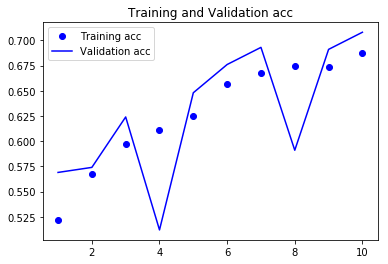

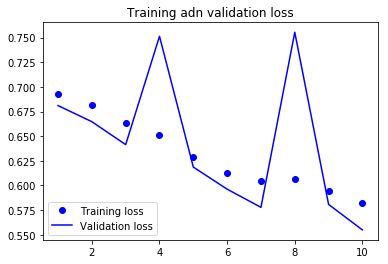

In [62]:
from matplotlib import pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation acc")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training adn validation loss")
plt.legend()
plt.show()

- Overfitting 하지 않는다.

# 6. Pretrained Network

- 사전 학습된 특성을 다른 문제에 적용할 수 있는 이런 유연성은 딥러닝의 장점이다. 이런 방식으로 작은 데이터셋을 가진 문제에도 딥러닝이 효율적으로 작동할 수 있다.

- 사전 훈련된 네트워크를 사용하는 두 가지 방법이 있다. 특성 추출(feature extraction)과 미세 조정(fine tuning)이다.

## 1. 특성 추출

- 특성 추출은 사전에 학습된 네트워크 표현을 사용하여 새로운 샘플에서 흥미로운 특성을 뽑아내는 것입니다.


- 합성곱 기반 층을 동결하고 완전 연결 부분을 새로운 분류기로 바꾸어서 학습한다.


- 완전 연결 분류기는 1) 훈련된 클래스 집합에 특화되고 2) 더 이상 입력 이미지에 있는 객체 위치 정보를 가지지 않는다. 완전 연결 층은 공간 개념을 제거하지만 합성곱 맵은 객체 위치를 고려한다. 객체 위치가 중요한 문제라면 완전 연결 층에서 만든 특성은 크게 필요가 없다,

특정 합성곱 층에서 추출한 표현의 일반성 수준은 모델의 층의 깊이에 달려 있다. 모델의 하위 층은 지역적이고 매우 일반적인 특성 맵을 추출한다. 반면에 상위 층은 좀 더 추상적인 개념을 추출한다. 원본 모델이 훈련한 데이터셋과 많이 다르다면 전체 합성곱 기반 층보다는 하위 몇 개만 특성 추출에 사용하는 것이 좋다.

In [64]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

### 이 단계에서 2가지 방식이 있다.

1. 새로운 데이터셋에서 합성곱 기반 층을 실행하고 출력을 넘파이 배열로 디스크에 저장한다. 그 다음 이 데이터를 책의 1부에서 보았던 것과 비슷한 독립된 완전 연결 분류기의 입력으로 사용한다. 합성곱 연산은 전체 과정에서 가장 비싸다. 이 방식은 모든 입력 이미지에 대해 합성곱 기반 층을 한 번만 실행하면 되기에 빠르고 비용이 적게 든다. 하지만 이런 이유 때문에 데이터 증식을 사용할 수 없다.

2. 준비한 모델 위에 Dense 층을 쌓아 확장한다. 그 다음에 end-to-end로 전체 모델을 실행한다. 이 방식은 첫 번째 방식보다 더 비용이 많이 든다.

In [67]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

### 1. 데이터 증식을 사용하지 않는 특성 추출

In [65]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [66]:
base_dir = './datasets/cats_and_dogs_small/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [70]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary'
    )
    
    i = 0
    
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = labels_batch
        
        i+=1
        
        if i * batch_size >= sample_count:
            break
    return features, labels

In [72]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [74]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

In [75]:
from keras import models
from keras import layers
from keras import optimizers

In [76]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(train_features, train_labels, 
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 727us/step - loss: 0.5981 - acc: 0.6710 - val_loss: 0.4389 - val_acc: 0.8170
Epoch 2/30
2000/2000 [==============================] - 1s 601us/step - loss: 0.4299 - acc: 0.8030 - val_loss: 0.3625 - val_acc: 0.8640
Epoch 3/30
2000/2000 [==============================] - 1s 608us/step - loss: 0.3476 - acc: 0.8525 - val_loss: 0.3325 - val_acc: 0.8710
Epoch 4/30
2000/2000 [==============================] - 1s 598us/step - loss: 0.3062 - acc: 0.8730 - val_loss: 0.3106 - val_acc: 0.8760
Epoch 5/30
2000/2000 [==============================] - 1s 601us/step - loss: 0.2889 - acc: 0.8795 - val_loss: 0.2968 - val_acc: 0.8800
Epoch 6/30
2000/2000 [==============================] - 1s 606us/step - loss: 0.2593 - acc: 0.8925 - val_loss: 0.2931 - val_acc: 0.8730
Epoch 7/30
2000/2000 [==============================] - 1s 606us/step - loss: 0.2437 - acc: 0.9045 - val_loss: 0.2831 - val_acc: 0.8810


### 최고 정확도: 89%

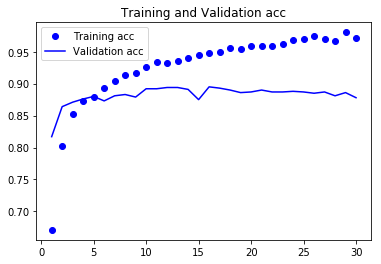

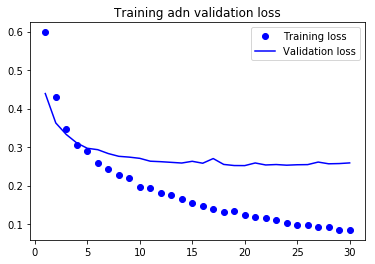

In [77]:
from matplotlib import pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation acc")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training adn validation loss")
plt.legend()
plt.show()

- 정확도는 더 높아졌지만, Overfitting 문제가 계속 존재한다.

### 2. 데이터 증식을 사용한 특성 추출

In [91]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
conv_base.trainable = False
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               2097408   
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [92]:
print("학습 가능한 가중치 수: ", len(model.trainable_weights))

학습 가능한 가중치 수:  4


In [93]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [94]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=10,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/10
100/100 [==============================] - 142s 1s/step - loss: 0.5396 - acc: 0.7195 - val_loss: 0.3947 - val_acc: 0.8010
Epoch 2/10
100/100 [==============================] - 139s 1s/step - loss: 0.4175 - acc: 0.8040 - val_loss: 0.3264 - val_acc: 0.8550
Epoch 3/10
100/100 [==============================] - 139s 1s/step - loss: 0.3739 - acc: 0.8295 - val_loss: 0.2777 - val_acc: 0.8770
Epoch 4/10
100/100 [==============================] - 139s 1s/step - loss: 0.3602 - acc: 0.8320 - val_loss: 0.2632 - val_acc: 0.8830
Epoch 5/10
100/100 [==============================] - 139s 1s/step - loss: 0.3459 - acc: 0.8465 - val_loss: 0.3151 - val_acc: 0.8550
Epoch 6/10
100/100 [==============================] - 139s 1s/step - loss: 0.3251 - acc: 0.8500 - val_loss: 0.3096 - val_acc: 0.8690
Epoch 7/10
100/100 [==============================] - 139s 1s/step - loss: 0.3493 - acc: 0.8425 - val_loss: 0.2759 - val_acc: 0.8840
Epoch 8/10
100/100 [==============================] - 139s 1s/step - 

### 최고 정확도: 89%

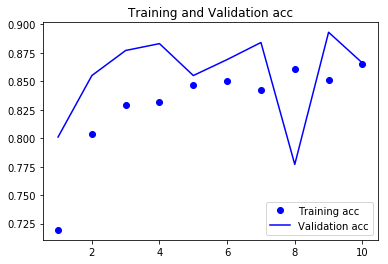

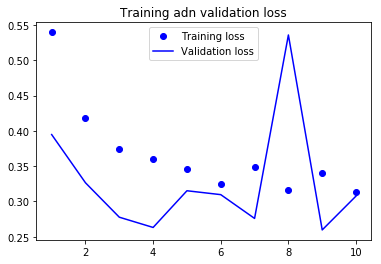

In [95]:
from matplotlib import pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation acc")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training adn validation loss")
plt.legend()
plt.show()

- 검증 정확도가 이전하고 비슷하지만 소규모 컨브넷보다 과대적합이 줄었다.

## 3. 미세 조정

- 미세 조정은 특성 추출에서 사용했던 동결 모델 상위 층 몇 개를 동결에서 해제하고 새로 추가한 층과 함께 학습하는 것이다.

### 네트워크를 미세 조정 하는 방법은 다음과 같습니다.

1. 사전에 훈련된 기반 네트워크 위에 새로운 네트워크를 추가한다.
2. 기반 네트워크를 동결한다.
3. 새로 추가한 네트워크를 훈련한다.
4. 일부 층의 동결을 해제한다.
5. 동결을 해제한 층과 새로운 층을 함께 훈련한다.

In [96]:
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

- 합성곱 기반 층에 있는 하위 층들은 좀 더 일반적이고 재사용 가능한 특성들을 인코딩합니다. 반면에 상위 층은 좀 더 특화된 특성을 인코딩한다. 새로운 문제에 재활용하도록 수정이 필요한 것은 구체적인 특성이므로 이를 미세 조정하는 것이 유리하다. 하위 층으로 갈수록 미세 조정 효과가 감소한다.

- 훈련해야 할 파라미터 수가 많을 수록 과대적합이 위험이 커진다. 합성곱 기반 층은 1,500만개의 파라미터를 가집니다. 작은 데이터셋으로 전부 훈련하려 하면 매우 위험합니다.

In [98]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [100]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/10
100/100 [==============================] - 161s 2s/step - loss: 0.2690 - acc: 0.8805 - val_loss: 0.2318 - val_acc: 0.9030
Epoch 2/10
100/100 [==============================] - 158s 2s/step - loss: 0.2402 - acc: 0.8940 - val_loss: 0.2183 - val_acc: 0.9080
Epoch 3/10
100/100 [==============================] - 157s 2s/step - loss: 0.2268 - acc: 0.9055 - val_loss: 0.2091 - val_acc: 0.9160
Epoch 4/10
100/100 [==============================] - 160s 2s/step - loss: 0.2180 - acc: 0.9085 - val_loss: 0.1996 - val_acc: 0.9170
Epoch 5/10
100/100 [==============================] - 158s 2s/step - loss: 0.1973 - acc: 0.9190 - val_loss: 0.2535 - val_acc: 0.9100
Epoch 6/10
100/100 [==============================] - 158s 2s/step - loss: 0.1793 - acc: 0.9310 - val_loss: 0.2349 - val_acc: 0.9140
Epoch 7/10
100/100 [==============================] - 158s 2s/step - loss: 0.1946 - acc: 0.9185 - val_loss: 0.2100 - val_acc: 0.9190
Epoch 8/10
100/100 [==============================] - 158s 2s/step - 

### 정확도: 92%

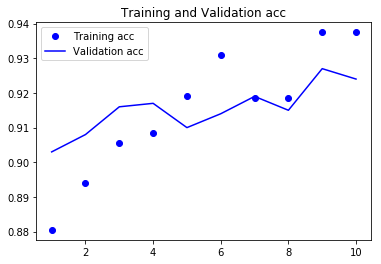

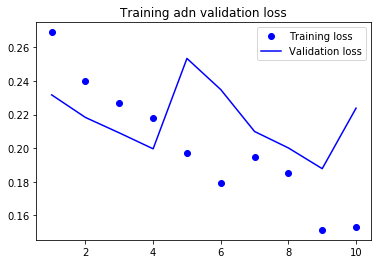

In [101]:
from matplotlib import pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation acc")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training adn validation loss")
plt.legend()
plt.show()

In [103]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

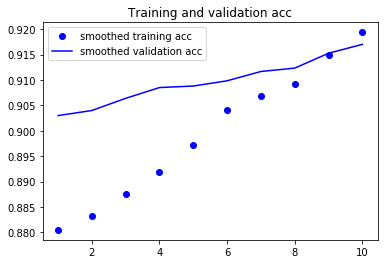

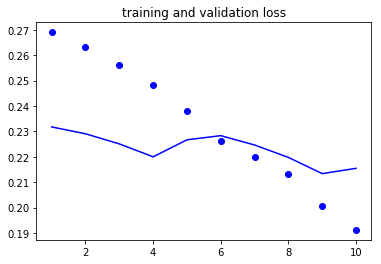

In [106]:
plt.plot(epochs, smooth_curve(acc), 'bo', label='smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label="smoothed validation acc")
plt.title("Training and validation acc")
plt.legend()

plt.figure()
plt.plot(epochs, smooth_curve(loss), 'bo', label='smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='smoothed validation loss')
plt.title("training and validation loss")
plt.show()

- 손실 곡선은 실제 향상을 얻지 못했습니다. 손실이 감소되지 않았는데 어떻게 정확도가 안정되거나 향상될 수 있을까요? 그래프는 개별적인 손실 값의 평균을 그린 것이다. 하지만 정확도에 영향을 미치는 것은 손실 값의 분포이지 평균이 아닙니다. 정확도는 모델이 예측한 클래스 확률이 어떤 임계 값을 넘었는지에 대한 결과이기 때문입니다. 모델이 더 향상되더라도 평균 손실에 반영되지 않을 수 있습니다.

In [107]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print("test acc: ", test_acc)

Found 1000 images belonging to 2 classes.
test acc:  0.9239999926090241


# 7. 정리

- 작은 데이터셋에서는 과대적합이 큰 문제입니다. 데이터 증식은 이미지 데이터를 다룰 때 과대 적합을 막을 수 있는 가장 강력한 방법입니다.

- 특성 추출 방식으로는 새로운 데이터셋에 기존 컨브넷을 쉽게 재사용할 수 있다. 작은 이미지 데이터셋으로 효괒거인 방법이다.

- 특성 추출을 보완하기 위해 미세 조정을 사용할 수 있다. 미세 조정은 기존 모델에서 사전에 학습한 표현의 일부를 새로운 문제에 적응시킵니다. 이 기법은 좀 더 성능을 끌어올립니다.